In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2023-12-29 14:33:32.059909: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 14:33:32.109237: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-29 14:33:32.110273: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-29 14:33:33.069511: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 8

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1158 (4.52 KB)
Trainable params: 1158 (4.52 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
39/43 [==========================>...] - ETA: 0s - loss: 2.0226 - accuracy: 0.1951
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 1s 9ms/step - loss: 2.0167 - accuracy: 0.1967 - val_loss: 1.9021 - val_accuracy: 0.2637
Epoch 2/1000
24/43 [===============>..............] - ETA: 0s - loss: 1.9303 - accuracy: 0.2467
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 1.9105 - accuracy: 0.2519 - val_loss: 1.8201 - val_accuracy: 0.2815
Epoch 3/1000
 1/43 [..............................] - ETA: 0s - loss: 1.9165 - accuracy: 0.2500

/home/ayush15/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


22/43 [==============>...............] - ETA: 0s - loss: 1.8601 - accuracy: 0.2536
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 1.8448 - accuracy: 0.2681 - val_loss: 1.7473 - val_accuracy: 0.3361
Epoch 4/1000
22/43 [==============>...............] - ETA: 0s - loss: 1.8125 - accuracy: 0.2784
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 1.7890 - accuracy: 0.2876 - val_loss: 1.6759 - val_accuracy: 0.3651
Epoch 5/1000
24/43 [===============>..............] - ETA: 0s - loss: 1.7399 - accuracy: 0.3164
Epoch 5: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 1.7189 - accuracy: 0.3285 - val_loss: 1.5941 - val_accuracy: 0.4359
Epoch 6/1000
41/43 [===========================>..] - ETA: 0s - loss: 1.6596 - accuracy: 0.3487
Epoch 6: savin

23/43 [===============>..............] - ETA: 0s - loss: 1.0635 - accuracy: 0.6029
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 1.0546 - accuracy: 0.6062 - val_loss: 0.6213 - val_accuracy: 0.9025
Epoch 31/1000
22/43 [==============>...............] - ETA: 0s - loss: 1.0163 - accuracy: 0.6261
Epoch 31: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 1.0356 - accuracy: 0.6167 - val_loss: 0.6189 - val_accuracy: 0.9080
Epoch 32/1000
23/43 [===============>..............] - ETA: 0s - loss: 1.0267 - accuracy: 0.6124
Epoch 32: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 1.0406 - accuracy: 0.6120 - val_loss: 0.6074 - val_accuracy: 0.9097
Epoch 33/1000
23/43 [===============>..............] - ETA: 0s - loss: 1.0284 - accuracy: 0.6148
Epoch 33

25/43 [================>.............] - ETA: 0s - loss: 0.9036 - accuracy: 0.6681
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.9096 - accuracy: 0.6620 - val_loss: 0.4423 - val_accuracy: 0.9225
Epoch 58/1000
21/43 [=============>................] - ETA: 0s - loss: 0.9238 - accuracy: 0.6544
Epoch 58: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.9178 - accuracy: 0.6605 - val_loss: 0.4492 - val_accuracy: 0.9231
Epoch 59/1000
24/43 [===============>..............] - ETA: 0s - loss: 0.9266 - accuracy: 0.6527
Epoch 59: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.9194 - accuracy: 0.6568 - val_loss: 0.4419 - val_accuracy: 0.9242
Epoch 60/1000
22/43 [==============>...............] - ETA: 0s - loss: 0.9046 - accuracy: 0.6690
Epoch 60

41/43 [===========================>..] - ETA: 0s - loss: 0.8555 - accuracy: 0.6942
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.8582 - accuracy: 0.6946 - val_loss: 0.3969 - val_accuracy: 0.9197
Epoch 85/1000
26/43 [=================>............] - ETA: 0s - loss: 0.8379 - accuracy: 0.6905
Epoch 85: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.8392 - accuracy: 0.6877 - val_loss: 0.3881 - val_accuracy: 0.9303
Epoch 86/1000
25/43 [================>.............] - ETA: 0s - loss: 0.8476 - accuracy: 0.6897
Epoch 86: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.8490 - accuracy: 0.6879 - val_loss: 0.3906 - val_accuracy: 0.9287
Epoch 87/1000
23/43 [===============>..............] - ETA: 0s - loss: 0.8433 - accuracy: 0.6797
Epoch 87

43/43 [==============================] - ETA: 0s - loss: 0.8184 - accuracy: 0.7001
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.8184 - accuracy: 0.7001 - val_loss: 0.3734 - val_accuracy: 0.9175
Epoch 112/1000
21/43 [=============>................] - ETA: 0s - loss: 0.8065 - accuracy: 0.7024
Epoch 112: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.8174 - accuracy: 0.7057 - val_loss: 0.3631 - val_accuracy: 0.9253
Epoch 113/1000
23/43 [===============>..............] - ETA: 0s - loss: 0.7754 - accuracy: 0.7235
Epoch 113: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.8000 - accuracy: 0.7070 - val_loss: 0.3660 - val_accuracy: 0.9181
Epoch 114/1000
42/43 [============================>.] - ETA: 0s - loss: 0.8003 - accuracy: 0.7039
Ep

Epoch 138/1000
43/43 [==============================] - ETA: 0s - loss: 0.7970 - accuracy: 0.7120
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.7970 - accuracy: 0.7120 - val_loss: 0.3488 - val_accuracy: 0.9281
Epoch 139/1000
24/43 [===============>..............] - ETA: 0s - loss: 0.7730 - accuracy: 0.7158
Epoch 139: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.7658 - accuracy: 0.7167 - val_loss: 0.3534 - val_accuracy: 0.9236
Epoch 140/1000
22/43 [==============>...............] - ETA: 0s - loss: 0.7887 - accuracy: 0.7141
Epoch 140: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.7863 - accuracy: 0.7202 - val_loss: 0.3504 - val_accuracy: 0.9259
Epoch 141/1000
22/43 [==============>...............] - ETA: 0s - loss: 0.7671 - accu

Epoch 165/1000
23/43 [===============>..............] - ETA: 0s - loss: 0.7926 - accuracy: 0.7133
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.7727 - accuracy: 0.7250 - val_loss: 0.3355 - val_accuracy: 0.9337
Epoch 166/1000
24/43 [===============>..............] - ETA: 0s - loss: 0.7832 - accuracy: 0.7145
Epoch 166: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.7740 - accuracy: 0.7183 - val_loss: 0.3402 - val_accuracy: 0.9331
Epoch 167/1000
43/43 [==============================] - ETA: 0s - loss: 0.7619 - accuracy: 0.7213
Epoch 167: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
43/43 [==============================] - 0s 4ms/step - loss: 0.7619 - accuracy: 0.7213 - val_loss: 0.3356 - val_accuracy: 0.9314
Epoch 168/1000
23/43 [===============>..............] - ETA: 0s - loss: 0.7622 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

15/15 [==============================] - 0s 2ms/step - loss: 0.3405 - accuracy: 0.9320


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 63ms/step
[4.0009767e-02 1.2219724e-01 8.3620650e-01 2.8079492e-04 4.0758713e-04
 8.1655727e-04 4.9569015e-05 3.1993848e-05]
2


# 混同行列

57/57 [==============================] - 0s 2ms/step


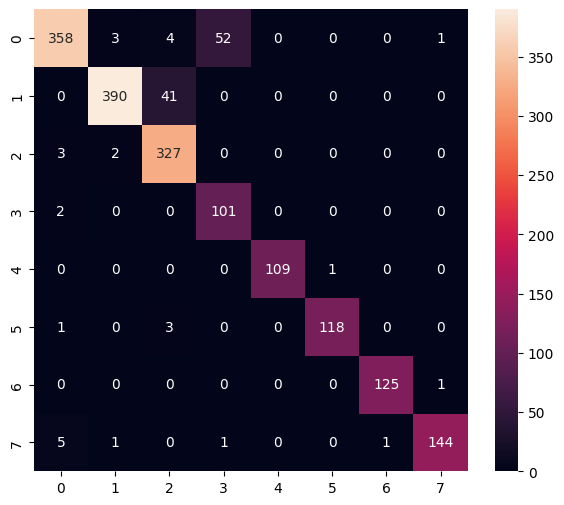

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       418
           1       0.98      0.90      0.94       431
           2       0.87      0.98      0.93       332
           3       0.66      0.98      0.79       103
           4       1.00      0.99      1.00       110
           5       0.99      0.97      0.98       122
           6       0.99      0.99      0.99       126
           7       0.99      0.95      0.97       152

    accuracy                           0.93      1794
   macro avg       0.93      0.95      0.94      1794
weighted avg       0.94      0.93      0.93      1794



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

/home/ayush15/.local/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /tmp/tmputkpar1m/assets


INFO:tensorflow:Assets written to: /tmp/tmputkpar1m/assets
2023-12-29 14:38:47.815975: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-12-29 14:38:47.816018: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-12-29 14:38:47.816404: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmputkpar1m
2023-12-29 14:38:47.817552: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2023-12-29 14:38:47.817568: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/tmputkpar1m
2023-12-29 14:38:47.820593: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2023-12-29 14:38:47.821522: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-12-29 14:38:47.855538: I tensorflow/cc/saved_model/loader.cc:215] Running initializatio

6720

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 770 µs, sys: 92 µs, total: 862 µs
Wall time: 763 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[4.0009756e-02 1.2219723e-01 8.3620661e-01 2.8079472e-04 4.0758718e-04
 8.1655703e-04 4.9568927e-05 3.1993794e-05]
2
